In [1]:
import os
import sys
import re
import time
import math
from datetime import timedelta
from datetime import timezone
from datetime import datetime
import json

# Third Party
import pandas as pd
import numpy as np
import requests

# PLOT
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()

In [2]:
n_round = 57

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
PUBLIC_KEY = os.getenv("REMOTE_TEST_PUBLIC_KEY1")

curl -X POST "https://df-sql.oceandao.org/challenge/data" \
-H "Content-Type: application/json" \
-d '{"query": {"round": 51}}'

In [3]:
#response = requests.get(f"https://df-sql.oceandao.org/challenge/data/?round={n_round}")



payload = {"query": {"round": n_round}}
headers = {"Content-Type": "application/json; charset=utf-8"}
response =  requests.post('https://df-sql.oceandao.org/challenge/data',  data=json.dumps(payload), headers=headers)

In [4]:
json.dumps(payload)

'{"query": {"round": 57}}'

In [5]:
response

<Response [200]>

In [6]:
response.json()

[{'from_addr': '0x0006f31311c4aa4652c31692d11812c993fda0b2',
  'nft_addr': '0x61c65b33860c058b2bd93d6273d2857b8d71a5c5',
  'nmse': 7.2160000801,
  'round': 57},
 {'from_addr': '0x00087336e23054279cdc4e389afe48bf83a6e821',
  'nft_addr': '0xa1f712719a680adeab605c9c27d44cb79908cc1a',
  'nmse': 0.7542999983,
  'round': 57},
 {'from_addr': '0x0008b73a8363803e98f475a9d5b3579d8672c965',
  'nft_addr': '0x2960394216a55d2c6b61770309bec3deb0acd212',
  'nmse': 7.1500000954,
  'round': 57},
 {'from_addr': '0x0009ef12a01ce077b62b7242f998b8dbdb08e866',
  'nft_addr': '0x54cb0b6bd87214e7087d752914c85491c8f2cdff',
  'nmse': 5.9959998131,
  'round': 57},
 {'from_addr': '0x0020a95bc0c3f056d0421b1126fb3c2831574d54',
  'nft_addr': '0x9d054ac8b9c0abc784b742e5c58efd66295c67f8',
  'nmse': 0.7336999774,
  'round': 57},
 {'from_addr': '0x002305cbeced1f519f9f3145e46479c6ca7e1760',
  'nft_addr': '0x9b84b3bda3bb8e46e19ccc64bbd038af4df4e011',
  'nmse': 3.236000061,
  'round': 57},
 {'from_addr': '0x002991576a7f917b0

In [7]:
list_dict = response.json()
df = pd.DataFrame.from_dict(list_dict)
df

,from_addr,nft_addr,nmse,round
0,0x0006f31311c4aa4652c31692d11812c993fda0b2,0x61c65b33860c058b2bd93d6273d2857b8d71a5c5,7.216000,57
1,0x00087336e23054279cdc4e389afe48bf83a6e821,0xa1f712719a680adeab605c9c27d44cb79908cc1a,0.754300,57
2,0x0008b73a8363803e98f475a9d5b3579d8672c965,0x2960394216a55d2c6b61770309bec3deb0acd212,7.150000,57
3,0x0009ef12a01ce077b62b7242f998b8dbdb08e866,0x54cb0b6bd87214e7087d752914c85491c8f2cdff,5.996000,57
4,0x0020a95bc0c3f056d0421b1126fb3c2831574d54,0x9d054ac8b9c0abc784b742e5c58efd66295c67f8,0.733700,57
...,...,...,...,...
2923,0xff764dc416f16f1fa9b1ce788cff40955b2199b6,0x4cf753ac7b6473896de23195318b5a15099927d3,4.078000,57
2924,0xff9c6098e63002b4820f61a54d5db0407758f825,0xf05e4bd097cbfc700e457fa091510dc9a4d9a0c7,69.620003,57
2925,0xffea903d570f601e20ded7859b1b09ff26ea66e2,0x539217abab2cc84f8d0431ae3cfda72ff5e4da86,2.095000,57
2926,0xffee0a2b6df34316aab5a19ac170e806df8090e6,0x86ffe00372c05e38de4cabaac256ca51b196ac7a,0.723400,57


In [8]:
df = df[df["nmse"]!=1]
df.sort_values(by="nmse", ignore_index=True, inplace=True)
df

/var/folders/m4/ng3wlwj109df2b8j9f4y4m7m0000gn/T/ipykernel_71398/3112475477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by="nmse", ignore_index=True, inplace=True)


,from_addr,nft_addr,nmse,round
0,0x4d3fcb3fa9304bbfe9e79925cb6853d2c61706c9,0x937609ee986da4f2358248395a8fe1b81882b3da,0.143100,57
1,0x0a97370f8241191a4ca2ee5ab140ee5e64c1f231,0x3ef334743c84922bc3d26154cc020679692e7fa4,0.174100,57
2,0xdc37931cb38273e987e28e5e4d21c867d5be9b6c,0x9d7c5feb3013eeb6431e2f60a5fb5539e636d84c,0.206800,57
3,0x0b912d8dc370a7f606abab7dc173fde6ba7e7d4d,0x019a778de098543aa6c88e06237220f6f086c69d,0.211000,57
4,0xe8b9778fb793df491d4e504184d8a49ac291e334,0xf93407d8018353a358a4dfea7ff5a0fabc75473c,0.228600,57
...,...,...,...,...
2922,0xf467b2ce944cd7bbb8ca431266de25e225fce6a2,0xa754aec419b6d32282a9e9563a48246fe7f7f91e,209.399994,57
2923,0xd9a4837b70aba98e6ff3434ddff0a9f1881f3ea4,0xc763a086f27d16155081686e15829ec080fb5139,242.800003,57
2924,0x56924af79e98db6066b127e8530b4ad623fd579a,0xead6a0e2ee15548530a617cc504f1714a39c0dea,294.100006,57
2925,0xbb6018fd9ee73ea7969eb9958f8f6275099ea204,0x62cbfee32b90e2a46daad55f2ef59acac18ea92f,300.700012,57


In [9]:
df[df["from_addr"].str.lower() == PUBLIC_KEY.lower()]["nmse"]

287    0.5099
Name: nmse, dtype: float64

In [10]:
df["from_addr"].nunique()

2927

In [11]:
df[(df["nmse"] < 0.99)] 

,from_addr,nft_addr,nmse,round
0,0x4d3fcb3fa9304bbfe9e79925cb6853d2c61706c9,0x937609ee986da4f2358248395a8fe1b81882b3da,0.1431,57
1,0x0a97370f8241191a4ca2ee5ab140ee5e64c1f231,0x3ef334743c84922bc3d26154cc020679692e7fa4,0.1741,57
2,0xdc37931cb38273e987e28e5e4d21c867d5be9b6c,0x9d7c5feb3013eeb6431e2f60a5fb5539e636d84c,0.2068,57
3,0x0b912d8dc370a7f606abab7dc173fde6ba7e7d4d,0x019a778de098543aa6c88e06237220f6f086c69d,0.2110,57
4,0xe8b9778fb793df491d4e504184d8a49ac291e334,0xf93407d8018353a358a4dfea7ff5a0fabc75473c,0.2286,57
...,...,...,...,...
944,0xc7c46b0ed71efd25ea78b7f4a56b6f3e8cea0dde,0xc04e4aeeb118d79ae312861a2dc228312266ee9c,0.9866,57
945,0xf82e996ab382ea4ed3adbef36d7338eaa70a69a8,0xb5d40ecbd6ac876703d836350ce3e49d19a2e358,0.9867,57
946,0x95b5d63972a59faabc6ca4727cfe1df2b156d01e,0x3261a8dfe4de1ba5c1fe84bb14e8513cd3dc327c,0.9878,57
947,0x4f367dce4162a2b867b774837d34f1cbb67b8ebb,0xbfd4090d8c8af78dee8b43fae10e464ea13c2972,0.9884,57


In [12]:
df[(df["nmse"] > 1) & (df["nmse"] < 1.529)]["from_addr"].nunique()

354

In [13]:
df[(df["nmse"] < 1)]["from_addr"].nunique()

961

(0.0, 10.0)

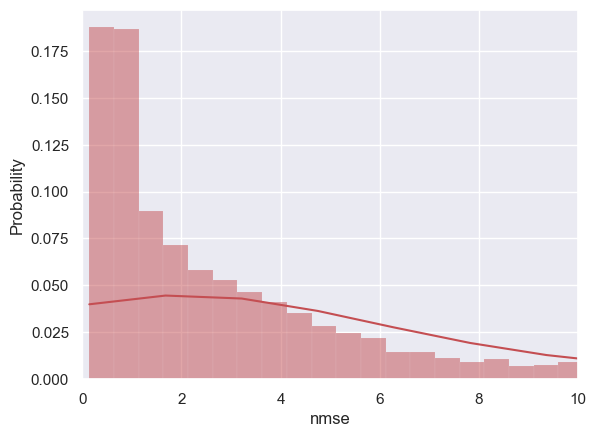

In [14]:
sns.histplot(
    data=df,
    x="nmse",  
    stat="probability", 
    kde=True, 
    color="r",
    label="TEST")
fig = plt.gcf()
ax = fig.gca()
ax.set_xlim([0,10])

In [15]:
df[(df["nmse"] == 1)]["from_addr"].nunique()

0

In [16]:
df[(df["nmse"] == 1)]["from_addr"].nunique() / df.shape[0]

0.0

In [17]:
df[(df["nmse"] == 1)].shape[0]

0

In [18]:
df.shape

(2927, 4)